Importing files

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn import linear_model # Scikit learn library that implements generalized linear models
from sklearn import neighbors # provides functionality for unsupervised and supervised neighbors-based learning methods
from sklearn.metrics import mean_squared_error # Mean squared error regression loss
from sklearn import preprocessing # provides functions and classes to change raw feature vectors

from math import log

In [ ]:
url = 'house_prediction(lr).csv'

data = pd.read_csv(url) 
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Data Cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
# converting some columns to categorical type
data['waterfront'] = data['waterfront'].astype('category')
data['view'] = data['view'].astype('category')
data['condition'] = data['condition'].astype('category')
data['grade'] = data['grade'].astype('category')

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# aggregatign zipcode data and counting instances for each zip code
zipcode_data = data.groupby('zipcode').aggregate(np.mean)
zipcode_data.reset_index(inplace = True)

In [ ]:
zipcode_data.head()

,zipcode,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,98001,4.664787e+09,2.808047e+05,3.383978,2.006215,1900.856354,14937.450276,1.429558,1721.325967,179.530387,1980.679558,43.801105,47.309020,-122.270646,1828.856354,11214.403315
1,98002,4.850894e+09,2.342840e+05,3.326633,1.839196,1627.743719,7517.633166,1.334171,1522.537688,105.206030,1967.773869,59.889447,47.308780,-122.213357,1479.030151,7585.482412
2,98003,4.674182e+09,2.941113e+05,3.357143,2.047321,1928.882143,10603.096429,1.310714,1663.550000,265.332143,1976.885714,21.360714,47.315741,-122.310054,1876.196429,9746.178571
3,98004,4.394237e+09,1.355927e+06,3.854890,2.527603,2909.022082,13104.220820,1.432177,2419.842271,489.179811,1971.470032,208.145110,47.616183,-122.205189,2674.700315,12805.022082
4,98005,4.961872e+09,8.101649e+05,3.851190,2.424107,2656.803571,19928.785714,1.279762,2160.196429,496.607143,1969.744048,47.630952,47.611532,-122.167268,2567.863095,18367.773810


In [ ]:
data['count'] = 1
count_houses_zipcode = data.groupby('zipcode').sum()
count_houses_zipcode.reset_index(inplace = True)
count_houses_zipcode = count_houses_zipcode[['zipcode', 'count']]
data.drop('count', axis = 1, inplace = True)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
zipcode_data = pd.merge(zipcode_data, count_houses_zipcode, how = 'left', on = ['zipcode'])
zipcode_data.head()

,zipcode,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,count
0,98001,4.664787e+09,2.808047e+05,3.383978,2.006215,1900.856354,14937.450276,1.429558,1721.325967,179.530387,1980.679558,43.801105,47.309020,-122.270646,1828.856354,11214.403315,362
1,98002,4.850894e+09,2.342840e+05,3.326633,1.839196,1627.743719,7517.633166,1.334171,1522.537688,105.206030,1967.773869,59.889447,47.308780,-122.213357,1479.030151,7585.482412,199
2,98003,4.674182e+09,2.941113e+05,3.357143,2.047321,1928.882143,10603.096429,1.310714,1663.550000,265.332143,1976.885714,21.360714,47.315741,-122.310054,1876.196429,9746.178571,280
3,98004,4.394237e+09,1.355927e+06,3.854890,2.527603,2909.022082,13104.220820,1.432177,2419.842271,489.179811,1971.470032,208.145110,47.616183,-122.205189,2674.700315,12805.022082,317
4,98005,4.961872e+09,8.101649e+05,3.851190,2.424107,2656.803571,19928.785714,1.279762,2160.196429,496.607143,1969.744048,47.630952,47.611532,-122.167268,2567.863095,18367.773810,168


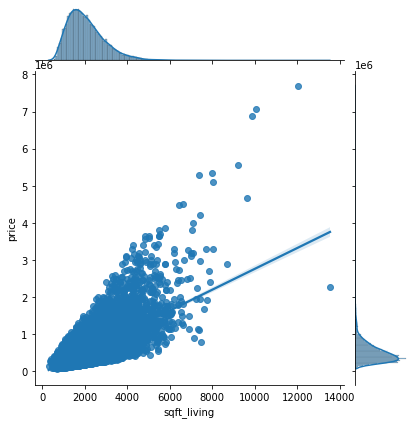

In [ ]:
# analyzing relationships and correlations between variables
sns.jointplot(x = 'sqft_living', y = 'price', data = data, kind = 'reg')
# clear linear relationship, indicating strong positive relationship

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2

NameError: ignored

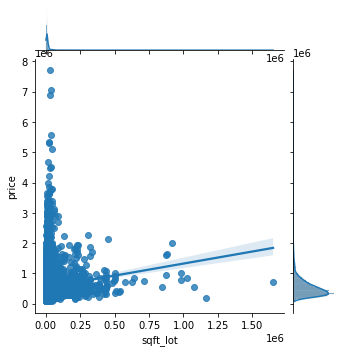

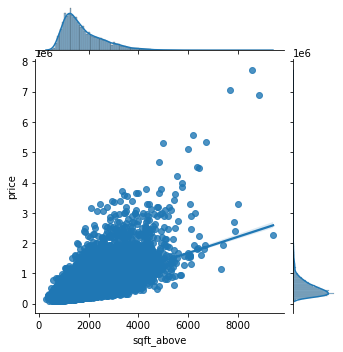

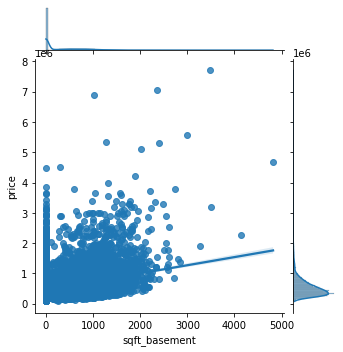

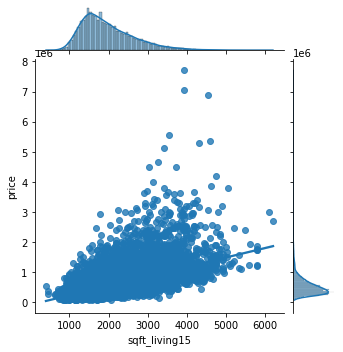

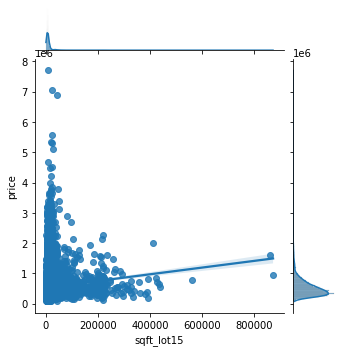

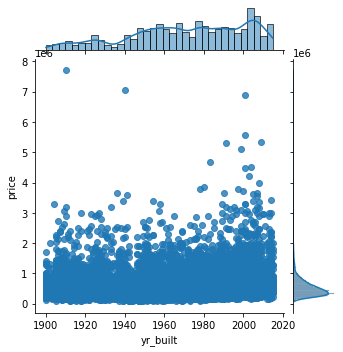

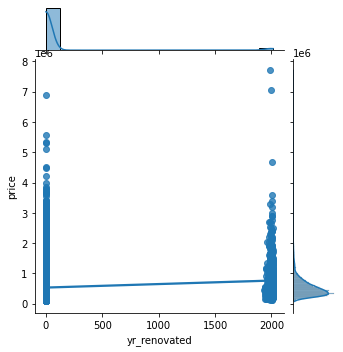

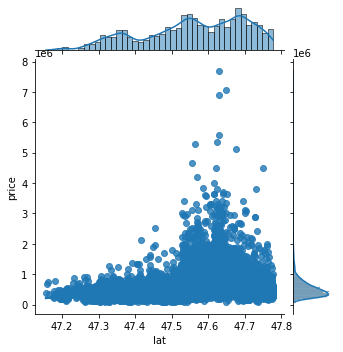

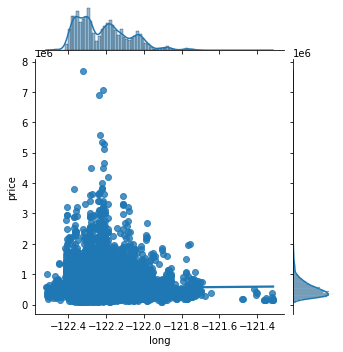

In [ ]:
# other joint plots
sns.jointplot(x="sqft_lot", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="sqft_above", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="sqft_basement", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="sqft_living15", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="sqft_lot15", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="yr_built", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="yr_renovated", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="lat", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="long", y="price", data=data, kind = 'reg', size = 5)
plt.show()

In [ ]:
# create 2 new columns for analysis as both have lots of null values
data['sqft_basement2'] = data['sqft_basement'].apply(lambda x: x if x> 0 else None)
data['yr_renovated2'] = data['yr_renovated'].apply(lambda x: x if x > 0 else None)

In [ ]:
data.isnull().sum()

id                    0
date                  0
price                 0
bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
floors                0
waterfront            0
view                  0
condition             0
grade                 0
sqft_above            0
sqft_basement         0
yr_built              0
yr_renovated          0
zipcode               0
lat                   0
long                  0
sqft_living15         0
sqft_lot15            0
sqft_basement2    13126
yr_renovated2     20699
dtype: int64

In [ ]:
# classifiying basement and year renovated as 0/1 dichotomous variables

data['basement_present'] = data['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
data['basement_present'] = data['basement_present'].astype('category')

data['renovated'] = data['yr_renovated'].apply(lambda x: 1 if x> 0 else 0)
data['renovated'] = data['yr_renovated'].astype('category')
data['renovated'] = data['renovated'].apply(lambda x: 1 if x > 0 else 0)
data['renovated'] = data['renovated'].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                21613 non-null  int64   
 1   date              21613 non-null  object  
 2   price             21613 non-null  float64 
 3   bedrooms          21613 non-null  int64   
 4   bathrooms         21613 non-null  float64 
 5   sqft_living       21613 non-null  int64   
 6   sqft_lot          21613 non-null  int64   
 7   floors            21613 non-null  float64 
 8   waterfront        21613 non-null  category
 9   view              21613 non-null  category
 10  condition         21613 non-null  category
 11  grade             21613 non-null  category
 12  sqft_above        21613 non-null  int64   
 13  sqft_basement     21613 non-null  int64   
 14  yr_built          21613 non-null  int64   
 15  yr_renovated      21613 non-null  int64   
 16  zipcode           2161

Pearson partial correlation can assess the association between two continuous variables whilst controlling for the effect of other continuous variables called covariates. In our example, we will test the relationship between price and sqft_living15 using sqft_living as covariate.

In [ ]:
# computing partial correlation - partial correlation will show the effect of one variable on another when controlling for the 3rd variable
# in this case, sqft_living15 has no effect on price when controlling for sqft_living (r = 0.06) 
features = [ 'price', 'sqft_living', 'sqft_living15']
df = data[features]
#import pingouin as pg
#pg.partial_corr(data = df, x = 'price', y = 'sqft_living', covar = 'sqft_living15').round(3)
#df.pcorr().round(3)



ModuleNotFoundError: ignored

Let's assess if having a waterfront is related to a higher house value. waterfront is a dichotomous variable with underlying continuous distribution (having a waterfront is better that not having a waterfront). We can use a point-biserial correlation coefficient to highlight the relationship between the two variables.

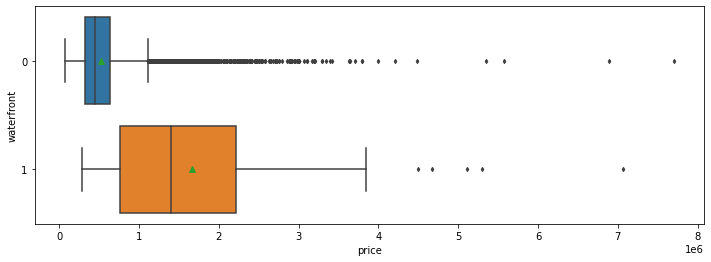

point biserial correlation r is 0.2663694340306022 with p = 0.0


In [ ]:
# looking into categorical variables
# Let's show boxplots first
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'waterfront', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
plt.show()

# Calculate the correlation coefficient
r, p = stats.pointbiserialr(data['waterfront'], data['price'])
print ('point biserial correlation r is %s with p = %s' %(r,p))

The no waterfront box plot is comparatively short. This suggests that overall, house prices in this group are very close to each other.
The waterfront box plot is comparatively tall. This suggests that house prices differ greatly in this group.
There is obvious shape differences between the two distributions, suggesting a higher sell price, in general, for houses with a waterfront. This is validated by a positive value of the point-biserial correlation.
The correlation if however small (r<0.3). Note that we haven't test here the 3 main assumptions of the point-biserial correlation and can't rely too much on the result (1: There should be no significant outliers in the two groups of the dichotomous variable in terms of the continuous variable, 2: There should be homogeneity of variances, 3: The continuous variable should be approximately normally distributed for each group of the dichotomous variable).

Running same test on basement present and whether house has been renovated

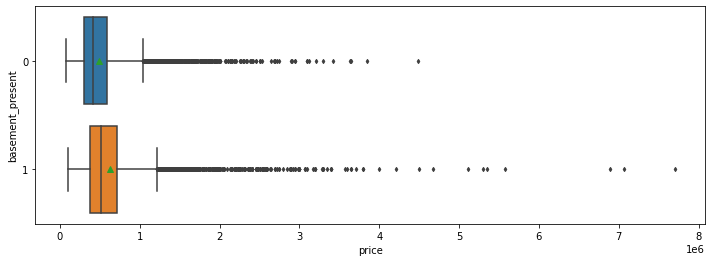

point biserial correlation r between price and basement_present is 0.18023008665021018 with p = 3.256778736238385e-157



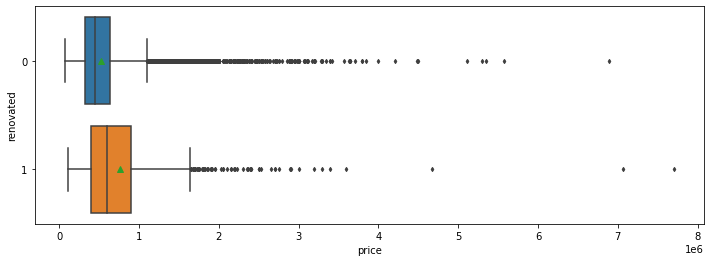

point biserial correlation r between price and renovated is 0.12609226271139523 with p = 2.640148591798377e-77


In [ ]:
# basement_present variable
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'basement_present', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
plt.show()
r, p = stats.pointbiserialr(data['basement_present'], data['price'])
print ('point biserial correlation r between price and basement_present is %s with p = %s' %(r,p))

# renovated variable
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'renovated', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
print ('')
plt.show()
r, p = stats.pointbiserialr(data['renovated'], data['price'])
print ('point biserial correlation r between price and renovated is %s with p = %s' %(r,p))

fairly small correlations

Looking at ordinal variables and their associations with house price

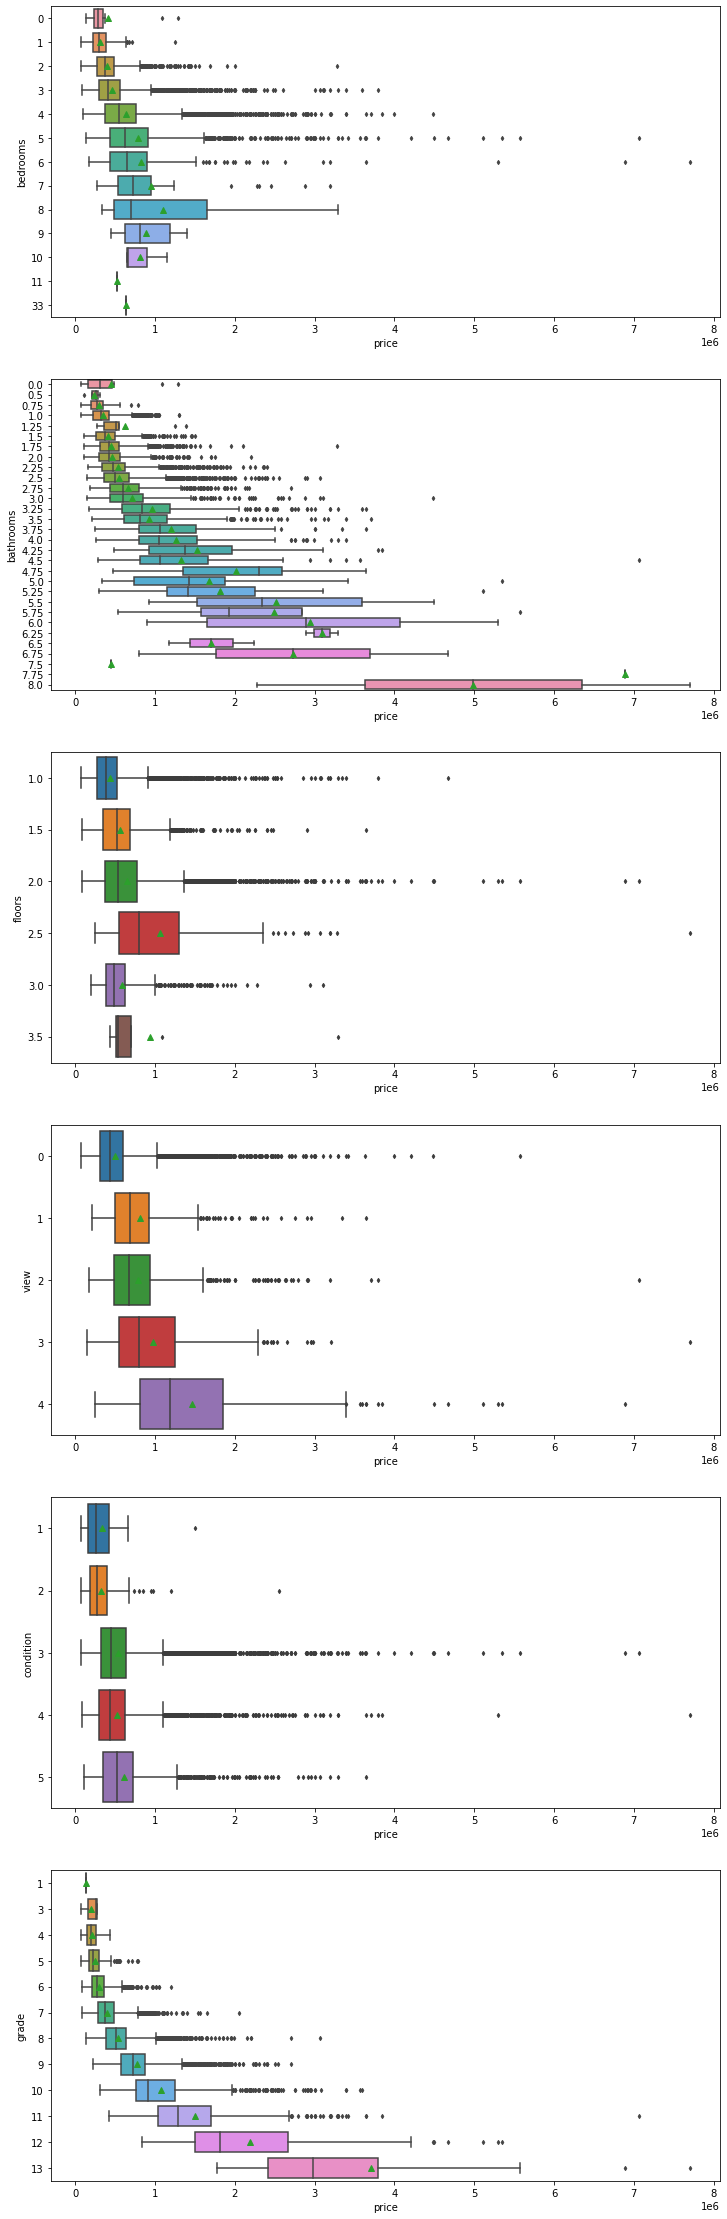

In [ ]:
fig, axarr = plt.subplots(6, figsize=(12,40))
sns.boxplot(y = 'bedrooms', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[0])
sns.boxplot(y = 'bathrooms', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[1])
sns.boxplot(y = 'floors', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[2])
sns.boxplot(y = 'view', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[3])
sns.boxplot(y = 'condition', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[4])
sns.boxplot(y = 'grade', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[5])
plt.show()

they all seem to be related to house price

Using spearman's rank-order correlation to measure the strength of the relationships between hoseu price and these variables

In [ ]:
r, p = stats.spearmanr(data['bedrooms'], data['price'])
print ('spearman correlation r between price and bedrooms is %s with p = %s' %(r,p))
r, p = stats.spearmanr(data['bathrooms'], data['price'])
print ('spearman correlation r between price and bathrooms is %s with p = %s' %(r,p))
r, p = stats.spearmanr(data['floors'], data['price'])
print ('spearman correlation r between price and floors is %s with p = %s' %(r,p))
r, p = stats.spearmanr(data['view'], data['price'])
print ('spearman correlation r between price and view is %s with p = %s' %(r,p))
r, p = stats.spearmanr(data['condition'], data['price'])
print ('spearman correlation r between price and condition is %s with p = %s' %(r,p))
r, p = stats.spearmanr(data['grade'], data['price'])
print ('spearman correlation r between price and grade is %s with p = %s' %(r,p))

spearman correlation r between price and bedrooms is 0.34465237095978885 with p = 0.0
spearman correlation r between price and bathrooms is 0.49716035081092047 with p = 0.0
spearman correlation r between price and floors is 0.32234655003563695 with p = 0.0
spearman correlation r between price and view is 0.29393116417024306 with p = 0.0
spearman correlation r between price and condition is 0.018489958301262526 with p = 0.006560828406548436
spearman correlation r between price and grade is 0.6582152214259374 with p = 0.0


condition does not have good correlation, grade has the highest correlation

sqft_living, sqft_above and sqft_basement were moderately/strongly associated with price. Paerson r was equal to 0.70, 0.61 and 0.41, respectively. The 3 variables were also strongly related to each other as sqft_living = sqft_above and sqft_basement.
sqft_living15, the average house square footage of the 15 closest neighbors, was also strongly related to price (r = 0.59) . However, when controlling for sqft_living, the relationship disappeared ( r=0.06 ).
sqft_lot, sqft_lot15 (average lot size of the 15 closest houses) and yr_built were poorly related to price.
The three dichotomous variables (waterfront, basement_present, renovated) were associated with price. The associations were small (r < 0.3)
Five of the ordinal parameters (bedrooms, bathrooms, floors, views, grade) were also moderately to strongly associated with price.

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement2,yr_renovated2,basement_present,renovated
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,NaN,NaN,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,400.0,1991.0,1,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,NaN,NaN,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,910.0,NaN,1,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,NaN,NaN,0,0


In [ ]:
# dropping data and id
data.drop(['id', 'date'], axis = 1, inplace = True)

 Encoding categorical variables with dummies

In [ ]:
categorical_cols = ['floors', 'view', 'condition', 'grade']
data2 = data
for cc in categorical_cols:
    dummies = pd.get_dummies(data[cc], drop_first=False)
    dummies = dummies.add_prefix("{}#".format(cc))
    data.drop(cc, axis=1, inplace=True)
    data = data.join(dummies)
dummies.head()

,floors#1.0,floors#1.5,floors#2.0,floors#2.5,floors#3.0,floors#3.5
0,1,0,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


Splitting data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, train_size = 0.8, random_state = 10)

2. Regression Models

In this section, we will train numerous regression models on the train data (e.g., simple linear regression, lasso, nearest neighbor) and evaluate their performance using Root Mean Squared Error (RMSE) on the test data.


In [ ]:
# simple linear regression
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(train_data[['sqft_living', 'grade']], train_data['price']) # fitting data



In [ ]:
# making predictions
val_predictions = linear_model.predict(test_data[['sqft_living', 'grade']])
RMSE = np.sqrt(mean_squared_error(test_data['price'], val_predictions))
print(RMSE) # RMSE
print(linear_model.coef_) # coefficients

262448.08235009166
[   174.71496876 104486.15091132]


In [ ]:
# running the same test on all the features in the dataset and assess which one would be the best estimator of house price using just a single linear regression model.

input_list = data.columns.values.tolist()
to_remove = ['price', 'sqft_basement2', 'yr_renovated2', 'basement_present', 'renovated']
for i in to_remove:
  input_list.remove(i)

simple_linear_result = pd.DataFrame(columns = ['feature', 'RMSE', 'intercept', 'coef'])

for p in input_list:

  linear_model.fit(train_data[[p]], train_data['price'])
  val_predictions = linear_model.predict(test_data[[p]])
  RMSE = np.sqrt(mean_squared_error(test_data['price'], val_predictions))
  simple_linear_result = simple_linear_result.append({'feature': p, 'RMSE': RMSE, 'intercept': linear_model.coef_[0], 'coef': linear_model.coef_[0]}, ignore_index = True)



In [ ]:
simple_linear_result

,feature,RMSE,intercept,coef
0,price,9.836454e-11,1.000000e+00,1.000000e+00
1,bedrooms,3.612954e+05,1.175799e+05,1.175799e+05
2,bathrooms,3.240828e+05,2.465239e+05,2.465239e+05
3,sqft_living,2.682796e+05,2.773641e+02,2.773641e+02
4,sqft_lot,3.809529e+05,8.414957e-01,8.414957e-01
5,waterfront,3.653937e+05,1.076564e+06,1.076564e+06
6,condition,3.819291e+05,1.972944e+04,1.972944e+04
7,grade,2.940361e+05,2.088971e+05,2.088971e+05
8,sqft_above,3.041313e+05,2.663068e+02,2.663068e+02
9,sqft_basement,3.578437e+05,2.581265e+02,2.581265e+02


In [ ]:
# adding higher order polynomial features
train_data['sqft_living_squared'] = train_data['sqft_living']**2  
test_data['sqft_living_squared'] = test_data['sqft_living'].apply(lambda x: x ** 2) # different way to do it
train_data.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,sqft_above,sqft_basement,...,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement2,yr_renovated2,basement_present,renovated,sqft_living_squared
15949,235000.0,2,1.00,930,10505,0,3,6,930,0,...,98148,47.4337,-122.329,1520,8881,NaN,NaN,0,0,864900
16409,225000.0,2,1.00,700,6000,0,3,6,700,0,...,98055,47.4671,-122.212,1320,6000,NaN,NaN,0,0,490000
14668,729000.0,3,1.00,1580,3840,0,3,8,1580,0,...,98102,47.6192,-122.319,1680,2624,NaN,NaN,0,0,2496400
6877,305000.0,3,2.25,1646,12414,0,3,7,1646,0,...,98038,47.3630,-122.035,1654,8734,NaN,NaN,0,0,2709316
20213,380000.0,3,3.25,1450,1468,0,3,8,1100,350,...,98126,47.5664,-122.370,1450,1478,350.0,NaN,1,0,2102500


While we can get better performance than simple linear models, a few problems remain.

First, we don't know which feature to select. Obviously some combinations of features will yield smaller RMSE on the test set.
Second, we don't know how many features to select. This is because the more features we incorporate in the train model, the more overfit we get on the train data, resulting in higher error on the test data.
One solution would be to test multiple features combinations (all?) and keep the solution with the smallest error value calculated on the test data. However, this is an overly optimistic approach, since the model complexity is selected to minimize the test error (error is biased). A more sophisticated approach is to use two sets for testing our models, a.k.a: a validation set and a test set. We select model complexity to minimize error on the validation set and approximate the generalization error based on the test set.

Going through all subsets of features combinations is most often computationally infeasible. For example, having 30 features yield more than 1 billion combinations. Another approach is to use a greedy technique like a forward stepwise algorithm where the best estimator feature is added to the set of already selected features at each iteration. For example, let's pretend that the best single estimator is sqft_living. In the 2nd step of the greedy algorithm, we test all the remaining features one by one in combinations with sqft_living (e.g., sqft_living and bedrooms, sqft_living and waterfront, etc) and select the best combination using training error. At the end, we select the model complexity (number of features) using the validation error and estimate the generalization error using the test set.

Let's try this method.

In [ ]:
# adding more features to the dataset

# sqft_living cubed
train_data['sqft_living_cubed'] = train_data['sqft_living'].apply(lambda x: x**3) 
test_data['sqft_living_cubed'] = test_data['sqft_living'].apply(lambda x: x**3) 

# bedrooms_squared: this feature will mostly affect houses with many bedrooms.
train_data['bedrooms_squared'] = train_data['bedrooms'].apply(lambda x: x**2) 
test_data['bedrooms_squared'] = test_data['bedrooms'].apply(lambda x: x**2)

# bedrooms times bathrooms gives what's called an "interaction" feature. It is large when both of them are large.
train_data['bed_bath_rooms'] = train_data['bedrooms']*train_data['bathrooms']
test_data['bed_bath_rooms'] = test_data['bedrooms']*test_data['bathrooms']

# Taking the log of squarefeet has the effect of bringing large values closer together and spreading out small values.
train_data['log_sqft_living'] = train_data['sqft_living'].apply(lambda x: log(x))
test_data['log_sqft_living'] = test_data['sqft_living'].apply(lambda x: log(x))

train_data.shape

(17290, 26)

In [ ]:
# splitting train_data to include a validation set 
train_data_2, validation_data = train_test_split(train_data, train_size = .75, random_state = 50)

In [ ]:
# A function that take multiple features as input and return the RMSE (of the train and validation data)
def RMSE(train, validation, features, new_input):
    features_list = list(features)
    features_list.append(new_input)
    regr = LinearRegression() # Create a linear regression object
    regr.fit(train[features_list], train['price']) # Train the model
    RMSE_train = mean_squared_error(train['price'], 
                              regr.predict(train[features_list]))**0.5 # Calculate the RMSE on train data
    RMSE_validation = mean_squared_error(validation['price'], 
                              regr.predict(validation[features_list]))**0.5 # Calculate the RMSE on validation data
    return RMSE_train, RMSE_validation 

In [ ]:
input_list = data.columns.values.tolist()
to_remove = ['price', 'sqft_basement2', 'yr_renovated2', 'basement_present', 'renovated']
for i in to_remove:
  input_list.remove(i)

In [ ]:
input_list_len = len(input_list)
# list of features included in the regression model and the calculated train and validation errors (RMSE)
regression_greedy_algorithm = pd.DataFrame(columns = ['feature', 'train_error', 'validation_error'])  
i = 0
temp_list = []

# a while loop going through all the features in the dataframe
while i < input_list_len-1:
    
    # a temporary dataframe to select the best feature at each iteration
    temp = pd.DataFrame(columns = ['feature', 'train_error', 'validation_error'])
    
    # a for loop to test all the remaining features
    for p in input_list:
        RMSE_train, RMSE_validation = RMSE(train_data_2, validation_data, temp_list, p)
        temp = temp.append({'feature':p, 'train_error':RMSE_train, 'validation_error':RMSE_validation}, ignore_index=True)
        
    temp = temp.sort_values('train_error') # select the best feature using train error
    best = temp.iloc[0,0]
    temp_list.append(best)
    regression_greedy_algorithm = regression_greedy_algorithm.append({'feature': best, 
                                                  'train_error': temp.iloc[0,1], 'validation_error': temp.iloc[0,2]}, 
                                                 ignore_index=True) # add the feature to the dataframe
    input_list.remove(best) # remove the best feature from the list of available features
    i += 1
regression_greedy_algorithm

,feature,train_error,validation_error
0,sqft_living,262112.035351,252447.351473
1,lat,242262.177402,235286.401617
2,waterfront,231266.427536,224390.941866
3,grade,221968.849934,212166.340373
4,yr_built,210093.796871,200901.542983
5,bedrooms,208876.812266,199560.112893
6,bathrooms,207696.543447,199374.119370
7,condition,207068.678137,198531.279309
8,sqft_living15,206532.704456,198114.390106
9,long,205764.757620,197546.387406


We can see that the validation error continues declining. If validation error were to start increasing, we'd stop the selection when validation error was at a minimum even if the training error keeps getting smaller (overfitting).

Let's now calculate an estimation of the generalization error using test_data

In [ ]:
greedy_algo_features_list = regression_greedy_algorithm['feature'].tolist()[:24] # select the first 30 features
linear_model.fit(train_data2[greedy_algo_features_list], train_data2['price'])
val_predictions = linear_model.predict(test_data[greedy_algo_features_list])

print('RMSE is : ', np.sqrt(mean_squared_error(val_predictions, test_data['price'])).round(3))


RMSE is :  210633.732


Note 1: We could have used k-fold cross validation instead of a validation set.
Note 2: Other greedy algorithms exist (e.g., backward stepwise, combining forward and backward steps)
Now, instead of searching over a discrete set of solutions using greedy algorithms, we can use another technique called regularization. We start with all possible features in the model and shrink the coefficients (weights). Two main regularization techniques exist, Ridge regression (a.k.a L2 regularization) and Lasso regression (a.k.a L1 regularization).

2.3 Ridge Regression

Ridge regression aims to avoid overfitting by adding a cost to the Residual Sum of Squares (RSS) term of standard least squares that depends on the 2-norm of the coefficients. The result is penalizing fits with large coefficients. The strength of this penalty, and thus the fit vs. model complexity, is controlled by a parameter alpha (here called "L2_penalty").

Let's test two models using alpha equal 1 and 10.

In [ ]:
from sklearn.linear_model import Ridge

input_feature = data.columns.values.tolist()
to_remove = ['price', 'sqft_basement2', 'yr_renovated2', 'basement_present', 'renovated']
for i in to_remove:
  input_feature.remove(i)

for i in [1, 10]:
  ridge = Ridge(alpha = i, normalize = True)
  ridge.fit(train_data[input_feature], train_data['price'])

  val_predictions = ridge.predict(test_data[input_feature])
  print('RMSE is : ', np.sqrt(mean_squared_error(val_predictions, test_data['price'])).round(3))


RMSE is :  240135.88
RMSE is :  326555.131


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

The question is, how do we pick alpha to minimize the error?

Alpha is a measure of model complexity. So, as before, we could use a validation set to select it. However, that approach has a major disadvantage: it leaves fewer observations available for training. A better approach to overcome this issue is to use a cross-validation technique. It uses all of the training set in a smart way. k-fold cross-validation for example involves dividing the training set into k segments of roughly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times. We then compute the average of the k validation errors, and use it as an estimate of the generalization error. We then select the alpha value that generate the smallest validation error. The best approximation occurs for validation sets of size 1, where k is equal to the number of observations. It is called leave-one-out cross validation. It is however computationally intensive.

In this example we'll use a ridge regression with an implemented cross-validation method from the scikit learn library. By default, it performs Generalized Cross-Validation, which is a form of efficient Leave-One-Out cross-validation.

In [ ]:
from sklearn.linear_model import RidgeCV
ridgeCV = RidgeCV(alphas = np.linspace(0.0001,1,num = 100), normalize = True, store_cv_values = True) # initialize the model
ridgeCV.fit(train_data[input_feature], train_data['price'])

val_predictions = ridgeCV.predict(test_data[input_feature])
print('Best alpha is : ', ridgeCV.alpha_)
print('RMSE is : ', np.sqrt(mean_squared_error(val_predictions, test_data['price'])).round(3))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Best alpha is :  0.0001
RMSE is :  211027.042


2.4 Lasso Regression

Lasso regression jointly shrinks coefficients to avoid overfitting, and implicitly performs feature selection by setting some coefficients exactly to 0 for sufficiently large penalty strength alpha (here called "L1_penalty"). In particular, lasso takes the RSS term of standard least squares and adds a 1-norm cost of the coefficients.

Let 's train multiple models using different alpha values and asses the test error.

In [ ]:
from sklearn.linear_model import Lasso
for i in [.01, .1, 1, 10, 100, 500]:
  lasso = Lasso(alpha = i, normalize = True)
  lasso.fit(train_data[input_feature], train_data['price']) # fir the train data
  print(lasso.sparse_coef_.getnnz)

  val_predictions = lasso.predict(test_data[input_feature])  # predict test data
  print('RMSE is : ', np.sqrt(mean_squared_error(val_predictions, test_data['price'])).round(3))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.183e+13, tolerance: 2.

<bound method _cs_matrix.getnnz of <1x16 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Row format>>
RMSE is :  211025.528


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.199e+13, tolerance: 2.281e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set

<bound method _cs_matrix.getnnz of <1x16 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Row format>>
RMSE is :  211025.861
<bound method _cs_matrix.getnnz of <1x16 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>>
RMSE is :  211079.186
<bound method _cs_matrix.getnnz of <1x16 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>>
RMSE is :  211647.689
<bound method _cs_matrix.getnnz of <1x16 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>>
RMSE is :  220032.103
<bound method _cs_matrix.getnnz of <1x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>>
RMSE is :  261929.332


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

As alpha increases, the number of features included in the model decrease. As in Ridge regression, we also can use cross-validation methods that select the best alpha to provide the best predictive accuracy. However, this technique tends to favor less sparse solutions and smaller alpha than optimal choice for feature selection.

In [ ]:
from sklearn.linear_model import LassoCV
lassoCV = LassoCV(normalize = True) # initialize the model (alphas are set automatically)
lassoCV.fit(train_data[input_feature], train_data['price'])

val_predictions = lassoCV.predict(test_data[input_feature])

print('Best alpha is : ', lassoCV.alpha_)
print ('number of non zero weigths is: ', np.count_nonzero(lassoCV.coef_)) # number of non zero weights
print('RMSE is : ', np.sqrt(mean_squared_error(val_predictions, test_data['price'])).round(3))

Best alpha is :  1.9312866392359815
number of non zero weigths is:  15
RMSE is :  211131.263


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


15 features remain in the model, with a test error of 211131.263.

2.5 k-Nearest Neighbors (NN) Regression¶

The k-NN algorithm is used for estimating continuous variables. One such algorithm uses a weighted average of the k nearest neighbors, weighted by the inverse of their distance. It is the nonparamtric equivalent of ordinary least square regression.

In [ ]:
# we need to normalize data first
train_X = train_data[input_feature]
scaler = preprocessing.StandardScaler().fit(train_X)
train_X_scaled = scaler.transform(train_X)

test_X = test_data[input_feature]
test_X_scaled = scaler.transform(test_X)

In [ ]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
knn.fit(train_X_scaled, train_data['price']) # fit training data

knn_predictions = knn.predict(test_X_scaled)

In [ ]:
print('RMSE is : ', np.sqrt(mean_squared_error(knn_predictions, test_data['price'])).round(3))

RMSE is :  165171.044


Similarly, the number of neighbor k is related to the complexity of the regression model. 

We can optimize the model accuracy by running cross-validation on the number of k-neighbors to include.